In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
k = 10    # number of bandits
eps = 0.06   # greedy exploration probability
steps = 1000
optimism = 5

In [0]:
# initialize
Q = np.zeros(k)   # the average reward
Q += optimism
N = np.zeros(k)   # number of occurences of a particular bandit

In [63]:
B = np.random.random(k)
B *= 2
B -= 1
B

array([-0.79035614, -0.79781129,  0.76582515, -0.73592575,  0.33197089,
       -0.94955265, -0.59740531,  0.61549616,  0.37034259,  0.04954963])

In [0]:
# outs a random number from the normal distribution of bandit index (0,9)
def bandit(index):
  return np.random.normal(B[index],1)

In [0]:
total_reward = 0
avg_reward = []

for i in range(steps):
  A = np.argmax(Q+0.5*np.sqrt(np.log(i+1)/(N+0.0001)))
  R = bandit(A)
  N[A] += 1
  Q[A] += (R - Q[A]) / N[A]
  total_reward += R
  avg_reward.append(total_reward/(i+1))

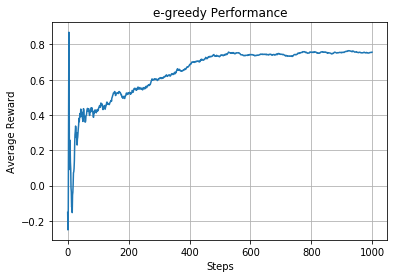

In [66]:
plt.plot(avg_reward)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('e-greedy Performance')
plt.grid(True)
plt.show()